# Exploratory Data Analysis(EDA)



## Notebook Summary:

This notebook presents exploratory data analysis (EDA) conducted on two dataframes: '**course_genres**' and '**course_ratings**'

The distribution of course counts for each genre was visualized using a barchart, allowing identification of under/over-represented courses.

A histogram was used to analyze the distribution of user ratings count, facilitating assessment of skewness.

To identify the top 20 courses by enrollment, a dataframe was created, this also displayed enrollments as a percentage of the total number of enrollments. The mean percentage of enrollments and mean number of enrollments were also computed.

A **Word cloud** was also produced to see the most common words in the dataframe, **stop words** was used to filter out common english words.

The methods employed consistently identified similar popular courses, indicating the accuracy and validity of the approaches used.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
#Main Csvs
course_genre_df = pd.read_csv('course_genre.csv')
course_ratings_df = pd.read_csv('course_ratings.csv')
user_profile_df = pd.read_csv("user_profile.csv")

In [29]:
course_genre_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [4]:
course_ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


In [30]:
# Obtain the number of enrollments by counting every enrollment (every row)
print(f"The number of enrollments is {course_ratings_df.shape[0]}")

The number of enrollments is 233306


In [6]:
# Get course counts per genre and sort them in descending order
genre_counts = course_genre_df.iloc[:, 1:].sum(axis=0)[1:].astype(int)
sorted_genre_counts = genre_counts.sort_values(ascending=False)


Database           60
Python             28
CloudComputing     37
DataAnalysis       56
Containers         17
MachineLearning    69
ComputerVision     10
DataScience        38
BigData            36
Chatbot             4
R                  17
BackendDev         78
FrontendDev        19
Blockchain          4
dtype: object

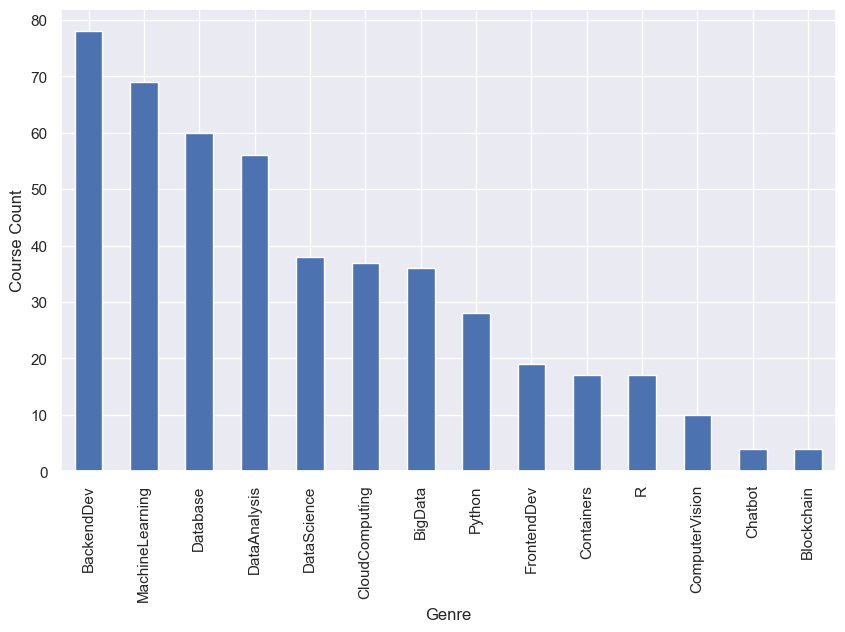

In [31]:
# Define the plot figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the sorted genre counts as a bar chart
sorted_genre_counts.plot(kind='bar', ax=ax)

# Set the x-axis and y-axis labels
ax.set_xlabel('Genre')
ax.set_ylabel('Course Count')

# Display the plot
plt.show()


In [10]:
# Group the ratings dataframe by the user column and get the size of each group
rating_counts = course_ratings_df.groupby('user').size()

# Get the total number of users after aggregation
num_users = rating_counts.size

# Print the total number of users
print(f'Total number of users: {num_users}')

# Describe ratings counts
rating_counts.describe()

Total number of users: 33901


count    33901.000000
mean         6.881980
std          5.823548
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         61.000000
dtype: float64

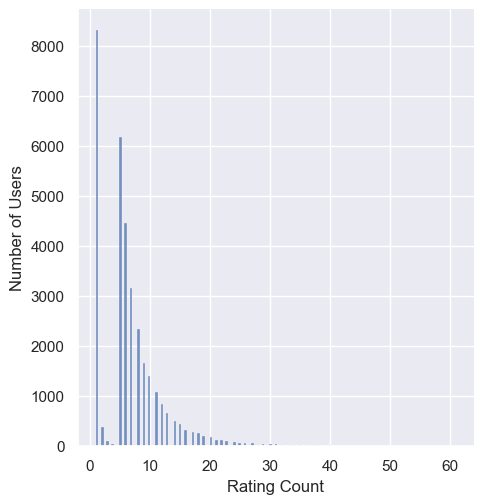

In [11]:
#Histogram of the number of users and the ratings count
# Set the figure size
sns.set(rc={'figure.figsize':(10,6)})

# Plot the histogram of rating counts with separated bars
sns.displot(rating_counts, kde=False, bins='auto')

# Set the x-axis label
plt.xlabel('Rating Count')

# Set the y-axis label
plt.ylabel('Number of Users')

# Show the plot
plt.show()

In [14]:
# Group the ratings dataframe by the item column and get the size of each group
enrollment_counts = course_ratings_df.groupby('item').size()

# Sort the enrollment counts in descending order and get the top 20 courses
top_20_courses = enrollment_counts.sort_values(ascending=False)[:20]

# Merge the course_df and top_20_courses dataframes on the item column and rename columns
merged_df = (
    pd.merge(course_genre_df.rename(columns={'COURSE_ID': 'item'}), 
             top_20_courses.reset_index().rename(columns={'item': 'item', 0: 'enrollments'}), 
             on='item')
    .loc[:, ['TITLE', 'enrollments']]
    .sort_values(by=['enrollments'], ascending=False)
    .reset_index(drop=True)
)


In [19]:
merged_df

,TITLE,enrollments,percentage
0,python for data science,14936,10.113212
1,introduction to data science,14477,9.802421
2,big data 101,13291,8.999377
3,hadoop 101,10599,7.176616
4,data analysis with python,8303,5.621987
5,data science methodology,7719,5.226559
6,machine learning with python,7644,5.175776
7,spark fundamentals i,7551,5.112805
8,data science hands on with open source tools,7199,4.874465
9,blockchain essentials,6719,4.549456


In [28]:
print(f"The percentage of enrollments of each course is {merged_df['percentage'].mean()}")
print(f"The mean of enrollments of each course is {merged_df['enrollments'].mean()}")

The percentage of enrollments of each course is 5.0
The mean of enrollments of each course is 7384.4


### Word Cloud of course titles

The word cloud provides a graphic representation of the importance or frequency of terms used in a body of text, in this case it was used on the ' course_genre_df ' pandas DataFrame. To ensure that Key terms were highlighted common English words were removed using stop words.

The generated word cloud leads to the general conclusion that courses featuring the programming language 'Python,' as well as topics on 'data science' and 'machine learning,' are among the most prevalent. As a result, ML models are likely to recommend courses containing these key terms to interested learners.


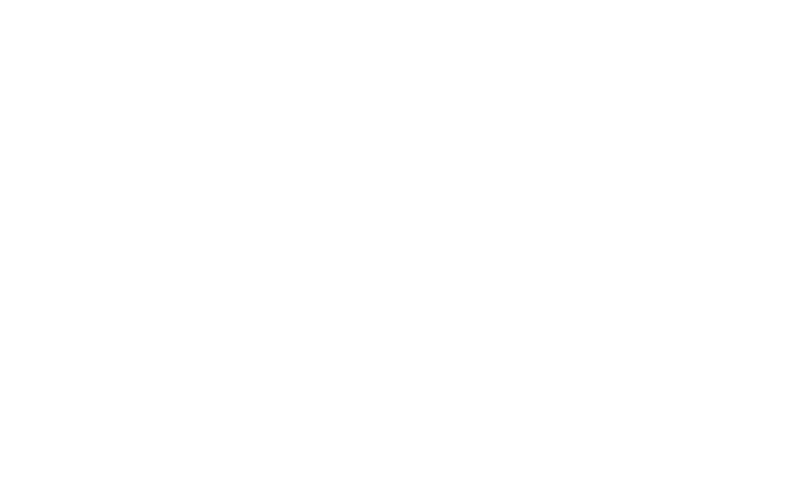

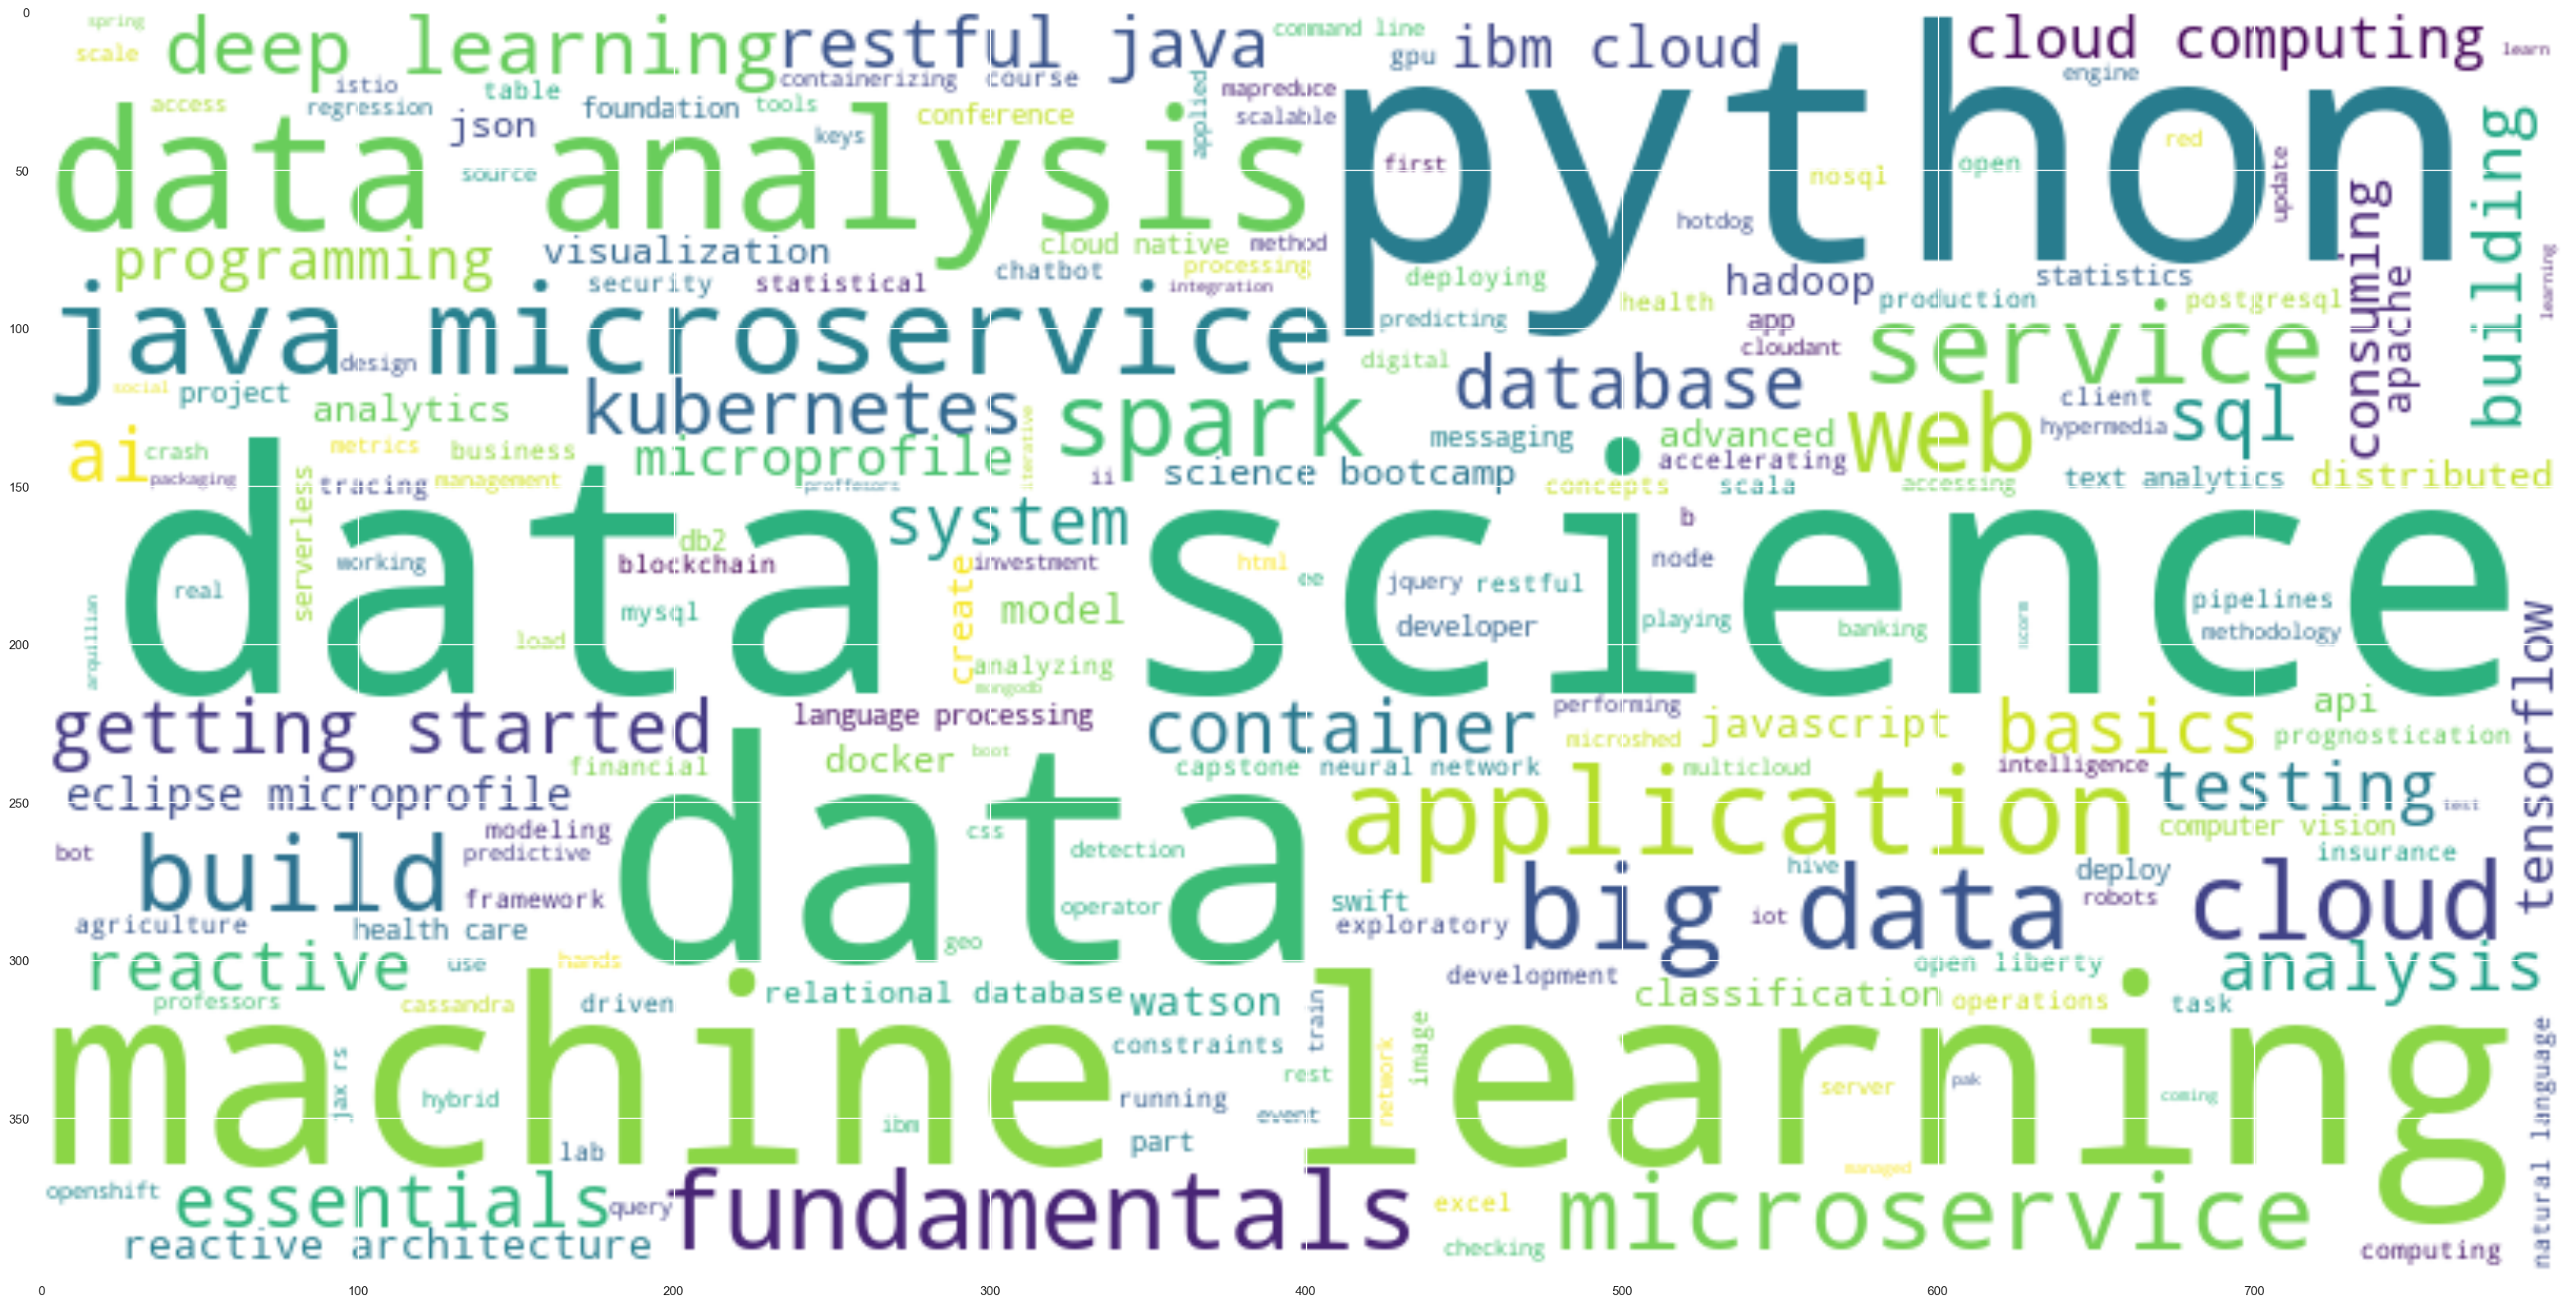

In [18]:
# Word cloud

#Plot a word cloud from course titles
titles = " ".join(course_genre_df['TITLE'].astype(str))
titles
# English Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

# Then, we create a WordCloud object and generate wordcloud from the titles.
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)
wordcloud.generate(titles)
plt.axis("off")
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
# Covaraiance matrix to see how features are correlated for the users
features = user_profile_df.loc[:, user_profile_df.columns != 'user']

sns.set_theme(style="white")

# Compute the correlation matrix
corr = features.cov()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.show()